In [12]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [13]:
import yfinance as yf

# Download GLID data from 2018-01-01 to 2025-04-30
df_glid = yf.download(
    "GILD", 
    start="2009-09-11", 
    end="2020-06-10"   # end date is exclusive, so use 2025-05-01 for up to April 30
)

# Reset index to make 'Date' a column
df_glid.reset_index(inplace=True)



[*********************100%***********************]  1 of 1 completed


In [14]:



# Save the DataFrame as a CSV file in the correct folder
df_glid.to_csv(r"C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\GLID_historical_data.csv", index=False)


In [15]:
print("Null values count per column:")
print(df_glid.isnull().sum())


Null values count per column:
Price   Ticker
Date              0
Close   GILD      0
High    GILD      0
Low     GILD      0
Open    GILD      0
Volume  GILD      0
dtype: int64


In [16]:
df_glid.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GILD,GILD,GILD,GILD,GILD
count,2704,2704.000000,2704.000000,2704.000000,2704.000000,2.704000e+03
mean,2015-01-24 06:41:32.307692288,44.758397,45.266328,44.234194,44.786832,1.283805e+07
min,2009-09-11 00:00:00,11.286867,11.531540,11.251408,11.347150,1.965800e+06
25%,2012-05-16 18:00:00,17.966612,18.124407,17.796403,17.983453,7.637350e+06
50%,2015-01-26 12:00:00,52.015684,52.521706,51.451613,52.004393,1.048960e+07
75%,2017-09-29 18:00:00,59.500319,60.222897,58.798151,59.496024,1.511018e+07
max,2020-06-09 00:00:00,86.984917,87.810531,86.586293,87.177065,1.464400e+08
std,NaN,21.474224,21.742348,21.202658,21.501544,9.124079e+06


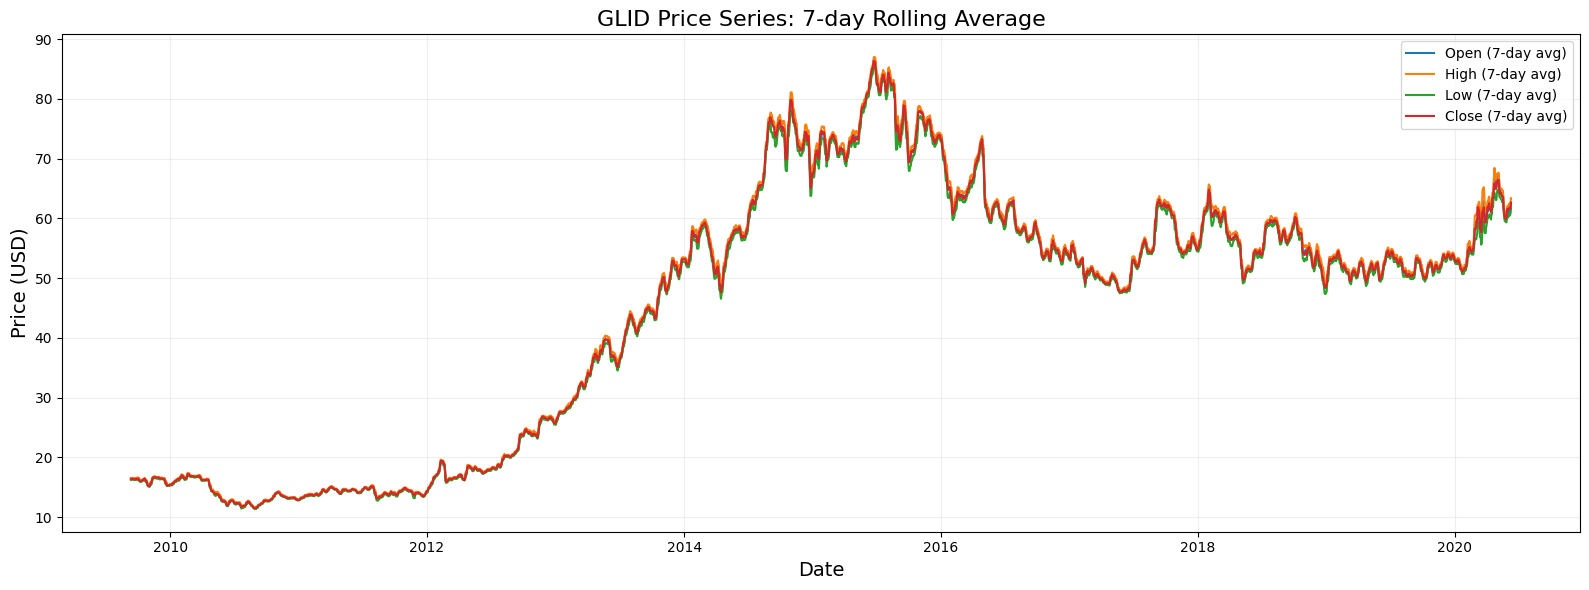

In [17]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_glid, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("GLID Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [18]:
print(df_glid.columns)
print(df_glid.columns[df_glid.columns.duplicated()])
print(type(df_glid['Close']))  # Should be Series, not DataFrame!



MultiIndex([(  'Date',     ''),
            ( 'Close', 'GILD'),
            (  'High', 'GILD'),
            (   'Low', 'GILD'),
            (  'Open', 'GILD'),
            ('Volume', 'GILD')],
           names=['Price', 'Ticker'])
MultiIndex([], names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>


In [19]:
df_glid.columns = ['_'.join([str(c) for c in col if c]) for col in df_glid.columns.values]
# Now 'Close_GLID', 'High_GLID', ...


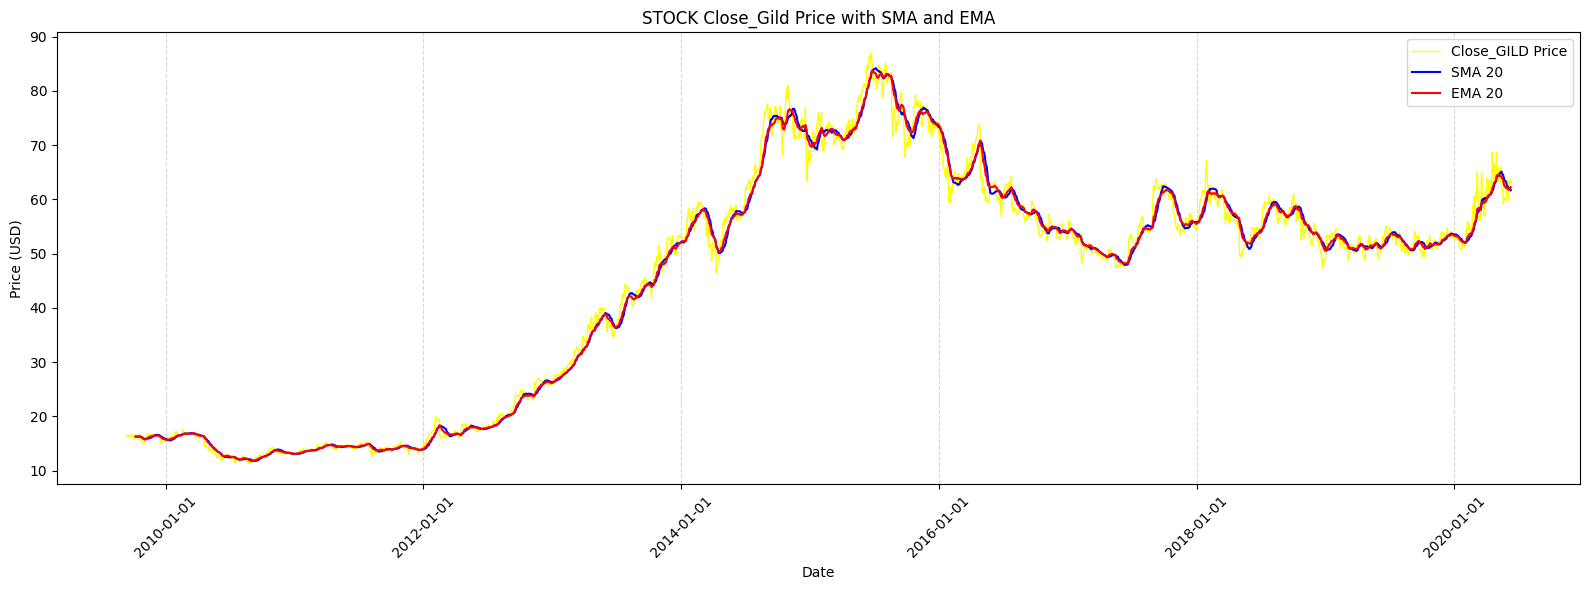

In [20]:
from src.plot_ma import plot_ma
plot_ma(df_glid, 'Close_GILD')

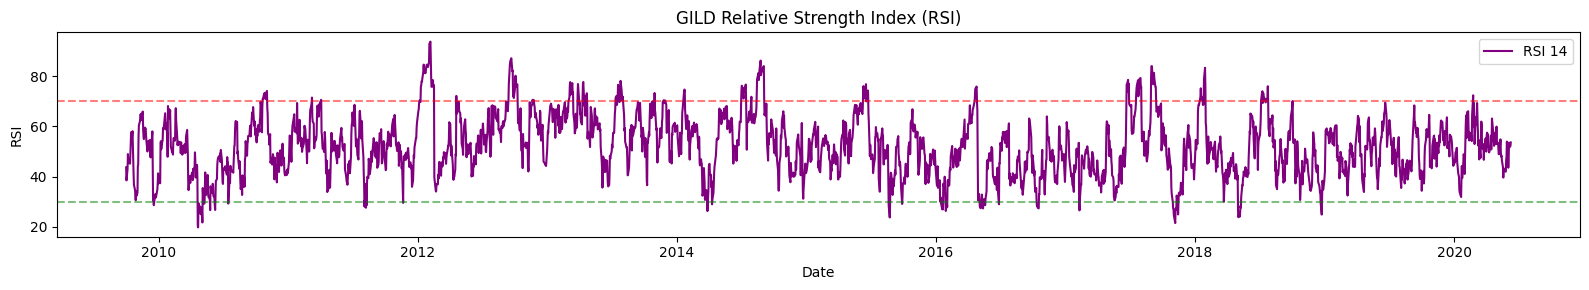

In [21]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_glid, price_col='Close_GILD', ticker_name='GILD')

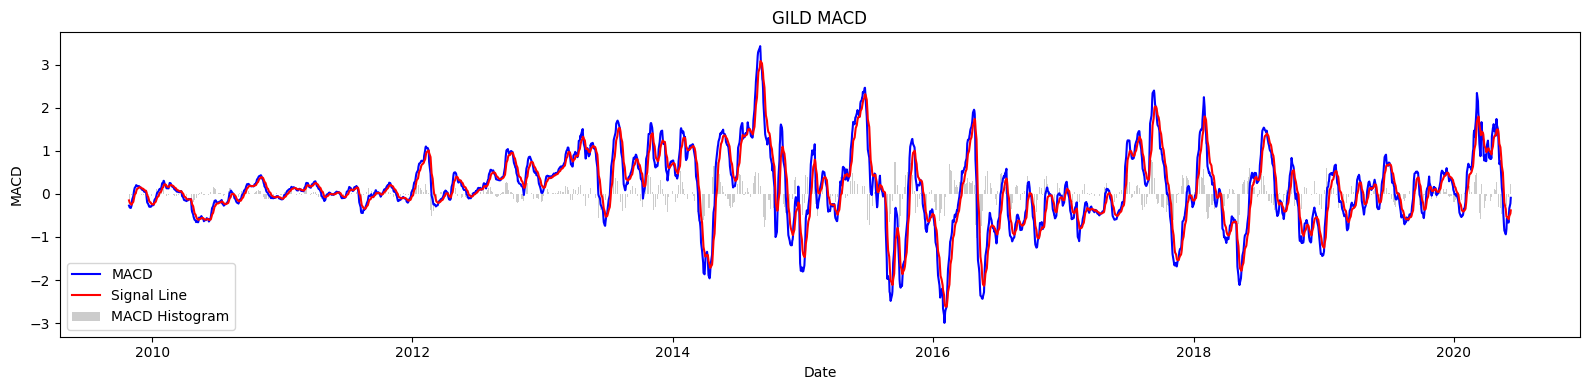

In [22]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_glid, price_col='Close_GILD', ticker_name='GILD')